In [15]:
import sys
sys.path.append('..')
from model_factory.fake_logo_detector import Fake_Logo_Detector
from gradio_client import Client, handle_file
from PIL import Image
from IPython.display import display

In [16]:
from huggingface_hub import hf_hub_download
from huggingface_hub.utils import RepositoryNotFoundError, EntryNotFoundError
repo_id = 'piyushjain4/fake_logo_inception_v3'
filename = 'modelac90.weights.h5'

try:
    file_path = hf_hub_download(repo_id=repo_id, filename=filename)
    print(f"The file has been downloaded to: {file_path}")
except (RepositoryNotFoundError, EntryNotFoundError) as e:
    print(f"An error occurred while downloading the file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

The file has been downloaded to: /root/.cache/huggingface/hub/models--piyushjain4--fake_logo_inception_v3/snapshots/61fc9f04831ff3734fddce16575fef57e3d9a721/modelac90.weights.h5


In [17]:
fake_logo_detector = Fake_Logo_Detector(file_path)

In [56]:
img_path = "/kaggle/working/saved_image.jpg" #path to image
def display_image(image_path,height=300):
    # Open the images using PIL
    pil_image = Image.open(img_path)
    display(pil_image)

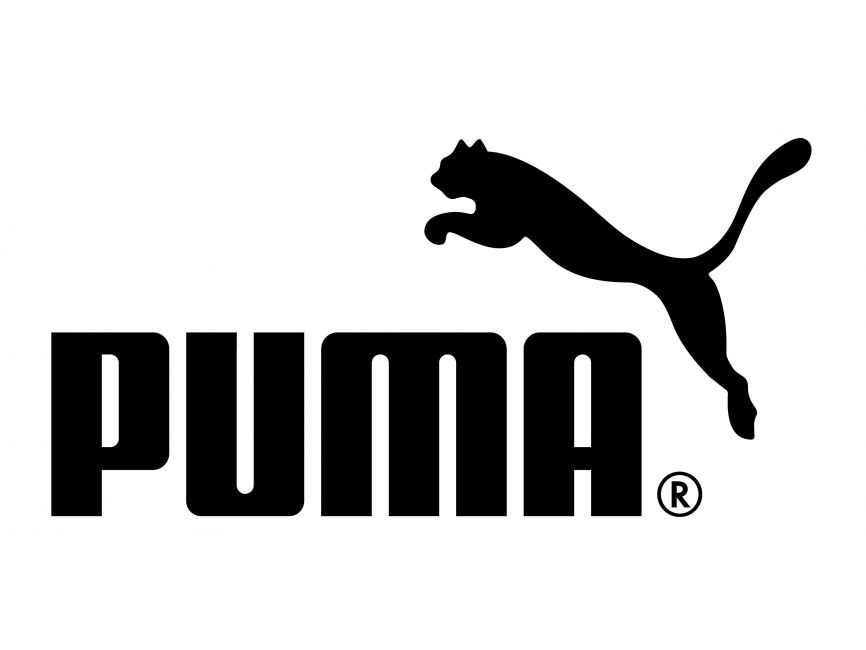

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


{'Puma Real': 0.9391136,
 'Puma Fake': 0.06086951,
 'Allen Solly Real': 5.319106e-06,
 'Us Polo Fake': 4.4428557e-06,
 'Allen Solly Fake': 3.3019235e-06,
 'Adidas Fake': 2.2064319e-06,
 'Us Polo Real': 9.979332e-07,
 'Adidas Real': 6.187763e-07}

In [57]:
display_image(img_path)
fake_logo_detector.fake_logo_detection(img_path)

# **Use via API**

In [58]:
client = Client("piyushjain4/fake_logo_detection")

Loaded as API: https://piyushjain4-fake-logo-detection.hf.space ✔


In [60]:
result = client.predict(
        input_image=handle_file(img_path),
        api_name="/predict")
print(result)

{'label': 'Puma Real', 'confidences': [{'label': 'Puma Real', 'confidence': 0.9391137361526489}, {'label': 'Puma Fake', 'confidence': 0.06086933612823486}]}
